# Setting

## Library

In [1]:
# 데이터 다루기
import pandas as pd
import numpy as np
from itertools import combinations

# 전처리
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA, KernelPCA, SparsePCA, TruncatedSVD, IncrementalPCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.random_projection import GaussianRandomProjection, SparseRandomProjection

# 모델링
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score # 재현율
from sklearn.metrics import precision_score # 정밀도
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# 기타
import os
import random

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings(action='ignore')

## Fixed Random Seed

In [4]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

# Load Data Set

## Googel Drive Mount

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Unzip File

In [6]:
!unzip --qq '/content/drive/MyDrive/머신러닝 엔지니어링/데이콘/사기거래/data/사기거래.zip'

## Load Train / Val / Test Set

In [7]:
train = pd.read_csv('/content/train.csv')
val = pd.read_csv('/content/val.csv')
test = pd.read_csv('/content/test.csv')

In [8]:
val['Class'].value_counts()

0    28432
1       30
Name: Class, dtype: int64

# Preprocessing

## Feature Selection

In [58]:
X_train = train.drop(columns=['ID']) 

X_val = val.drop(columns=['ID', 'Class']) 
y_val = val['Class']

X_test = test.drop(columns=['ID'])

In [59]:
X_train = X_train.drop(columns=['V6', 'V8', 'V13', 'V15', 'V19',
                                'V20', 'V21', 'V22', 'V23', 'V24',
                                'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V1']) 

X_val = X_val.drop(columns=['V6', 'V8', 'V13', 'V15', 'V19',
                                'V20', 'V21', 'V22', 'V23', 'V24',
                                'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V1']) 

X_test = X_test.drop(columns=['V6', 'V8', 'V13', 'V15', 'V19',
                                'V20', 'V21', 'V22', 'V23', 'V24',
                                'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V1']) 

In [60]:
len(X_train.columns)

13

# Modeling

In [61]:
val_normal, val_anomaly = val['Class'].value_counts()
val_contamination = val_anomaly / val_normal

print(f'Validation contamination : [{val_contamination}]')

Validation contamination : [0.0010551491277433877]


In [62]:
model = EllipticEnvelope(store_precision=True,
                         assume_centered=True, # 데이터 중심이 정확히 0이 아니기에 True로 설정합니다.
                         support_fraction=0.994, # IQR를 기준으로 극단값이 존재하였기에 데이터 일부는 사용하지 않습니다.
                         contamination=val_contamination, 
                         random_state=42,
                         )

# Evaluation

In [63]:
def get_pred_label(model_pred):
    # IsolationForest 모델 출력 (1:정상, -1:불량(사기)) 이므로 (0:정상, 1:불량(사기))로 Label 변환
    model_pred = np.where(model_pred == 1, 0, model_pred)
    model_pred = np.where(model_pred == -1, 1, model_pred)
    return model_pred


Drop Col : V6

Validation F1 Score : 0.8635044815916644

Recall : 0.6666666666666666

Precision : 0.8

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.80      0.67      0.73        30

    accuracy                           1.00     28462
   macro avg       0.90      0.83      0.86     28462
weighted avg       1.00      1.00      1.00     28462



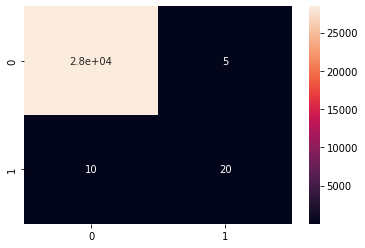


----------------------------------------------------------------------------------------------------


Drop Col : V8

Validation F1 Score : 0.8772441968135101

Recall : 0.6666666666666666

Precision : 0.8695652173913043

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.87      0.67      0.75        30

    accuracy                           1.00     28462
   macro avg       0.93      0.83      0.88     28462
weighted avg       1.00      1.00      1.00     28462



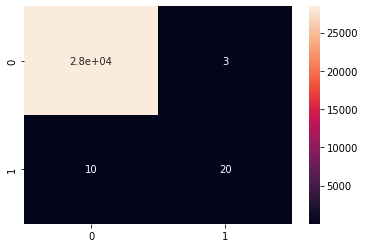


----------------------------------------------------------------------------------------------------


Drop Col : V13

Validation F1 Score : 0.899903286500554

Recall : 0.7333333333333333

Precision : 0.88

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.88      0.73      0.80        30

    accuracy                           1.00     28462
   macro avg       0.94      0.87      0.90     28462
weighted avg       1.00      1.00      1.00     28462



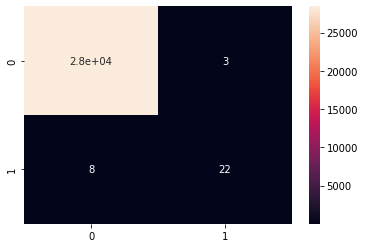


----------------------------------------------------------------------------------------------------


Drop Col : V15

Validation F1 Score : 0.899903286500554

Recall : 0.7333333333333333

Precision : 0.88

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.88      0.73      0.80        30

    accuracy                           1.00     28462
   macro avg       0.94      0.87      0.90     28462
weighted avg       1.00      1.00      1.00     28462



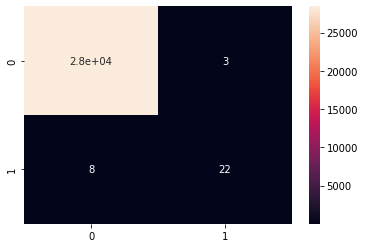


----------------------------------------------------------------------------------------------------


Drop Col : V19

Validation F1 Score : 0.899903286500554

Recall : 0.7333333333333333

Precision : 0.88

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.88      0.73      0.80        30

    accuracy                           1.00     28462
   macro avg       0.94      0.87      0.90     28462
weighted avg       1.00      1.00      1.00     28462



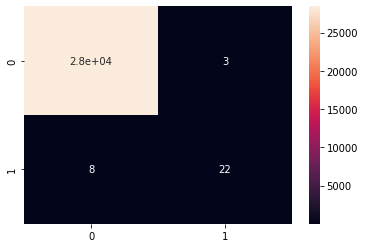


----------------------------------------------------------------------------------------------------


Drop Col : V20

Validation F1 Score : 0.8583586886309732

Recall : 0.6333333333333333

Precision : 0.8260869565217391

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.83      0.63      0.72        30

    accuracy                           1.00     28462
   macro avg       0.91      0.82      0.86     28462
weighted avg       1.00      1.00      1.00     28462



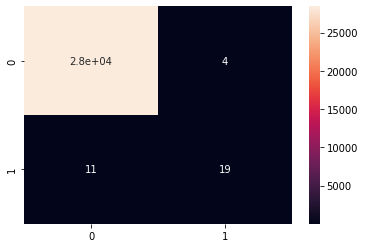


----------------------------------------------------------------------------------------------------


Drop Col : V21

Validation F1 Score : 0.8887833851083367

Recall : 0.7

Precision : 0.875

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.88      0.70      0.78        30

    accuracy                           1.00     28462
   macro avg       0.94      0.85      0.89     28462
weighted avg       1.00      1.00      1.00     28462



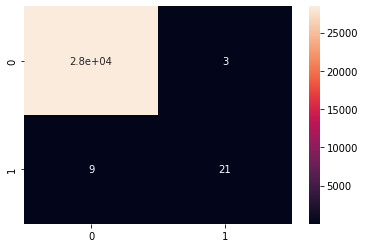


----------------------------------------------------------------------------------------------------


Drop Col : V22

Validation F1 Score : 0.899903286500554

Recall : 0.7333333333333333

Precision : 0.88

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.88      0.73      0.80        30

    accuracy                           1.00     28462
   macro avg       0.94      0.87      0.90     28462
weighted avg       1.00      1.00      1.00     28462



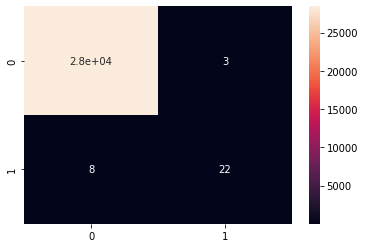


----------------------------------------------------------------------------------------------------


Drop Col : V23

Validation F1 Score : 0.857002180488148

Recall : 0.6666666666666666

Precision : 0.7692307692307693

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.77      0.67      0.71        30

    accuracy                           1.00     28462
   macro avg       0.88      0.83      0.86     28462
weighted avg       1.00      1.00      1.00     28462



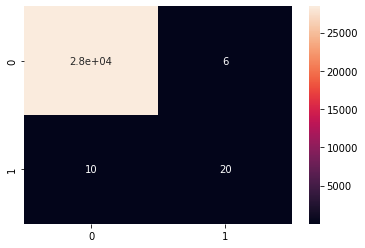


----------------------------------------------------------------------------------------------------


Drop Col : V24

Validation F1 Score : 0.8887833851083367

Recall : 0.7

Precision : 0.875

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.88      0.70      0.78        30

    accuracy                           1.00     28462
   macro avg       0.94      0.85      0.89     28462
weighted avg       1.00      1.00      1.00     28462



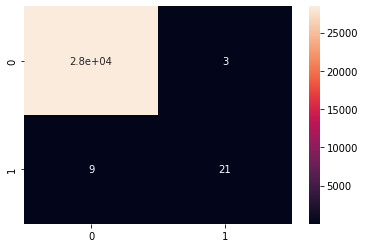


----------------------------------------------------------------------------------------------------


Drop Col : V25

Validation F1 Score : 0.8887833851083367

Recall : 0.7

Precision : 0.875

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.88      0.70      0.78        30

    accuracy                           1.00     28462
   macro avg       0.94      0.85      0.89     28462
weighted avg       1.00      1.00      1.00     28462



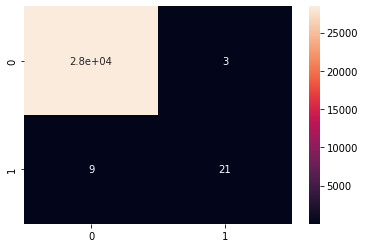


----------------------------------------------------------------------------------------------------


Drop Col : V26

Validation F1 Score : 0.8887833851083367

Recall : 0.7

Precision : 0.875

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.88      0.70      0.78        30

    accuracy                           1.00     28462
   macro avg       0.94      0.85      0.89     28462
weighted avg       1.00      1.00      1.00     28462



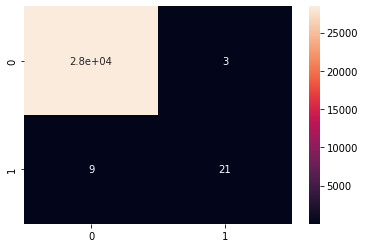


----------------------------------------------------------------------------------------------------


Drop Col : V27

Validation F1 Score : 0.8887833851083367

Recall : 0.7

Precision : 0.875

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.88      0.70      0.78        30

    accuracy                           1.00     28462
   macro avg       0.94      0.85      0.89     28462
weighted avg       1.00      1.00      1.00     28462



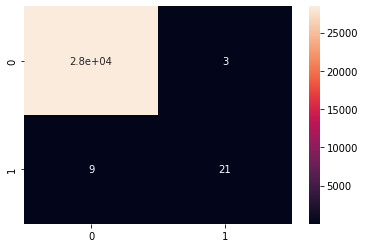


----------------------------------------------------------------------------------------------------


Drop Col : V28

Validation F1 Score : 0.8583586886309732

Recall : 0.6333333333333333

Precision : 0.8260869565217391

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.83      0.63      0.72        30

    accuracy                           1.00     28462
   macro avg       0.91      0.82      0.86     28462
weighted avg       1.00      1.00      1.00     28462



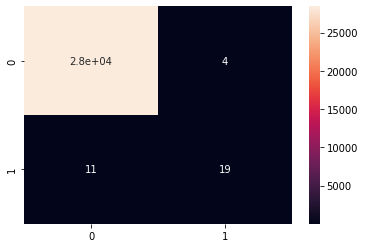


----------------------------------------------------------------------------------------------------


Drop Col : V29

Validation F1 Score : 0.870247282626393

Recall : 0.6666666666666666

Precision : 0.8333333333333334

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.83      0.67      0.74        30

    accuracy                           1.00     28462
   macro avg       0.92      0.83      0.87     28462
weighted avg       1.00      1.00      1.00     28462



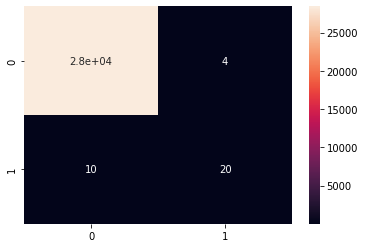


----------------------------------------------------------------------------------------------------


Drop Col : V30

Validation F1 Score : 0.899903286500554

Recall : 0.7333333333333333

Precision : 0.88

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.88      0.73      0.80        30

    accuracy                           1.00     28462
   macro avg       0.94      0.87      0.90     28462
weighted avg       1.00      1.00      1.00     28462



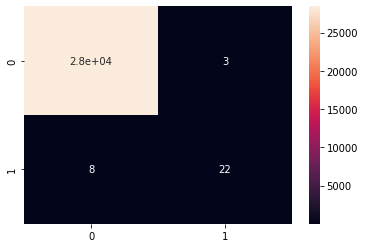


----------------------------------------------------------------------------------------------------



In [64]:
result_val = np.zeros(val.shape[0])
result_test = np.zeros(test.shape[0])

for drop_col in ['V6', 'V8', 'V13', 'V15',
                 'V19', 'V20', 'V21', 'V22',
                 'V23', 'V24', 'V25', 'V26',
                 'V27', 'V28', 'V29', 'V30']:

    X_train = pd.concat([train[[drop_col]], X_train], axis=1)
    X_val = pd.concat([val[[drop_col]], X_val], axis=1)
    X_test = pd.concat([test[[drop_col]], X_test], axis=1)

    model.fit(X_train)

    EE_pred_val = model.predict(X_val) # model prediction
    EE_pred_val = get_pred_label(EE_pred_val)

    val_score = f1_score(y_val, EE_pred_val, average='macro')
    recall = recall_score(y_val, EE_pred_val)
    precision = precision_score(y_val, EE_pred_val)

    print(f'\nDrop Col : {drop_col}\n')

    print(f'Validation F1 Score : {val_score}\n')
    print(f'Recall : {recall}\n')
    print(f'Precision : {precision}\n')

    print(classification_report(y_val, EE_pred_val))

    cf_matrix = confusion_matrix(y_val, EE_pred_val)
    sns.heatmap(cf_matrix, annot=True)
    plt.show()

    print()
    print('-'*100)
    print()

    EE_pred_test = model.predict(X_test) # model prediction
    EE_pred_test = get_pred_label(EE_pred_test)

    result_val += EE_pred_val
    result_test += EE_pred_test

    X_train = X_train.drop(columns=[drop_col])
    X_val = X_val.drop(columns=[drop_col])
    X_test = X_test.drop(columns=[drop_col])

# Inference

In [66]:
def check(result, ts, val):

  pred_result = []

  for i in result:

    if i >= ts:

      i = 1

    else:

      i = 0

    pred_result.append(i)

  if val == True:

    val_score = f1_score(y_val, pred_result, average='macro')
    recall = recall_score(y_val, pred_result)
    precision = precision_score(y_val, pred_result)

    print(f'Marco F1 Score : {val_score}\n')
    print(f'Recall : {recall}\n')
    print(f'Precision : {precision}\n')

    print(classification_report(y_val, pred_result))

  return pred_result

Marco F1 Score : 0.899903286500554

Recall : 0.7333333333333333

Precision : 0.88

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.88      0.73      0.80        30

    accuracy                           1.00     28462
   macro avg       0.94      0.87      0.90     28462
weighted avg       1.00      1.00      1.00     28462




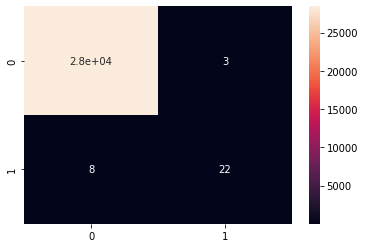

In [90]:
pred_val = check(result_val, 3, val=True)

print()

cf_matrix = confusion_matrix(y_val, pred_val)
sns.heatmap(cf_matrix, annot=True)
plt.show()

In [ ]:
pred_test = check(result_test, 3, val=False)

# Submission

In [ ]:
submit = pd.read_csv('./sample_submission.csv')

In [ ]:
submit['Class'] = EE_pred_test
submit.head()

,ID,Class
0,AAAA0x1,0
1,AAAA0x2,0
2,AAAA0x5,0
3,AAAA0x7,0
4,AAAA0xc,0


In [ ]:
submit.to_csv('./Ensemble_EE.csv', index=False)